## Packages

In [1]:
 import gdown
 import pandas as pd
 import IPython.display as display
 # Google Drive file ID
 file_id = "1kgaIYgekgPAEYwCRxlKf6pzyPmu7amKx"
 download_url = f"https://drive.google.com/uc?id={file_id}"
 file_path = "/content/merged_climate_malaria_data.csv"
 gdown.download(download_url, file_path, quiet=False)
 data = pd.read_csv(file_path)
 display.display(data.head(10))

Downloading...
From: https://drive.google.com/uc?id=1kgaIYgekgPAEYwCRxlKf6pzyPmu7amKx
To: /content/merged_climate_malaria_data.csv
100%|██████████| 10.9k/10.9k [00:00<00:00, 15.5MB/s]


,period,PRECTOTCORR,PRECTOTCORR_SUM,PS,QV2M,RH2M,T2M,T2M_MAX,T2M_MIN,TS,confirmed,suspected,untested_treated
0,1/1/2013,0.00,0.00,96.88,12.51,62.94,24.90,34.15,13.84,24.49,4028,NaN,14108
1,2/1/2013,0.00,0.00,96.73,14.53,68.50,25.94,36.19,14.48,26.05,5554,NaN,13036
2,3/1/2013,5.27,84.38,96.76,17.58,79.31,26.53,34.65,21.34,26.87,6166,NaN,9040
3,4/1/2013,5.27,158.20,96.81,17.70,81.81,26.06,32.82,21.27,26.30,4821,NaN,12161
4,5/1/2013,5.27,131.84,96.92,17.64,83.81,25.58,31.61,21.11,25.83,5958,NaN,15281
5,6/1/2013,5.27,137.11,97.00,17.21,85.75,24.74,29.45,20.05,25.01,6986,NaN,16472
6,7/1/2013,5.27,142.38,97.07,16.48,85.69,24.09,28.93,19.87,24.45,9687,NaN,17236
7,8/1/2013,5.27,121.29,96.96,15.99,83.06,24.12,29.90,18.79,24.54,10269,NaN,20508
8,9/1/2013,5.27,179.30,96.98,16.85,84.94,24.55,30.51,20.26,24.74,7008,NaN,20658
9,10/1/2013,5.27,131.84,96.93,16.78,82.94,24.98,31.12,20.38,25.27,8344,NaN,21633


In [2]:
from google.colab import drive
import matplotlib.font_manager as fm
import matplotlib as mpl
import os

# ✅ Mounting Google Drive
drive.mount('/content/drive')


font_path = "/content/drive/MyDrive/times.ttf"


if os.path.isfile(font_path):
    times_new_roman = fm.FontProperties(fname=font_path)
    mpl.rcParams['font.family'] = times_new_roman.get_name()
    print("✅ Times New Roman loaded successfully!")
else:
    print("Font not found. Check the path.")


Mounted at /content/drive
✅ Times New Roman loaded successfully!


In [3]:
df =data['confirmed']

In [4]:
import pandas as pd


df = pd.DataFrame(df)

df['period'] = pd.date_range(start='2013-01-01', periods=len(df), freq='MS')
df.set_index('period', inplace=True)

print(df.head())
print(df.index.freq)

            confirmed
period               
2013-01-01       4028
2013-02-01       5554
2013-03-01       6166
2013-04-01       4821
2013-05-01       5958
None


In [5]:
import pandas as pd

df = pd.DataFrame(data['confirmed'])

df['period'] = pd.date_range(start='2013-01-01', periods=len(df), freq='MS')
df.set_index('period', inplace=True)

print(df.head())
print(df.index.freq)

            confirmed
period               
2013-01-01       4028
2013-02-01       5554
2013-03-01       6166
2013-04-01       4821
2013-05-01       5958
None


In [6]:
confirmed_data = df
confirmed_data

,confirmed
period,
2013-01-01,4028
2013-02-01,5554
2013-03-01,6166
2013-04-01,4821
2013-05-01,5958
...,...
2023-08-01,19759
2023-09-01,18340
2023-10-01,19164


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Times New Roman loaded successfully.


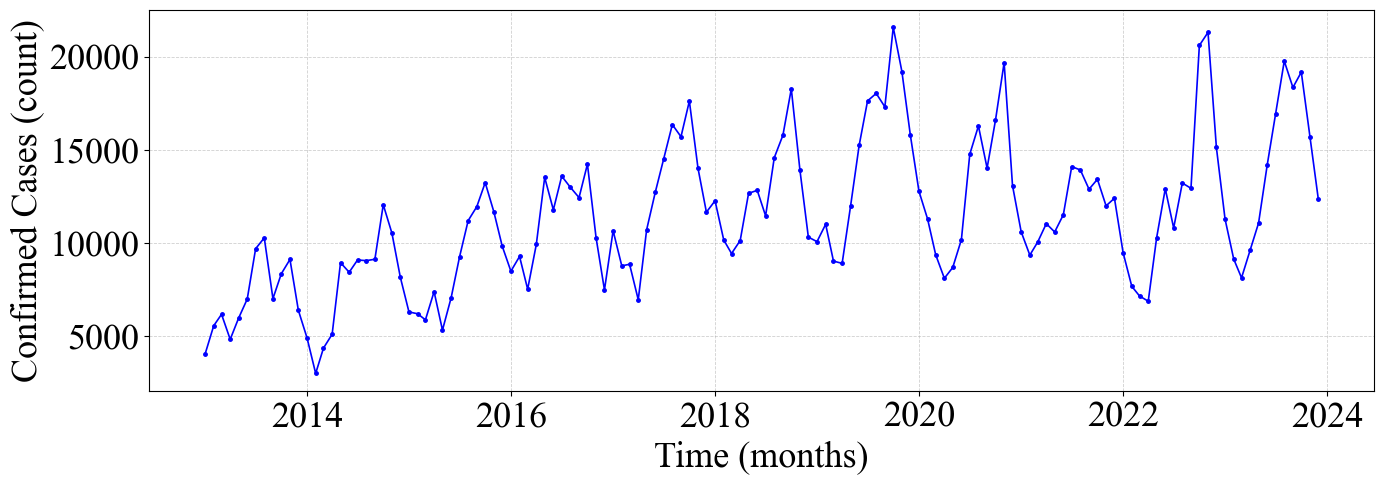

In [7]:
# ===============================================
# ✅ IMPORT LIBRARIES
# ===============================================
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os
from google.colab import drive

# ===============================================
# ✅ MOUNT GOOGLE DRIVE
# ===============================================
drive.mount('/content/drive')

# ===============================================
# ✅ LOAD DATA
# ===============================================
df = pd.read_csv("merged_climate_malaria_data.csv")
df['period'] = pd.to_datetime(df['period'])
df.set_index('period', inplace=True)
df = df.asfreq('MS')
df['confirmed'] = df['confirmed'].astype(float)

# ===============================================
# ✅ LOAD TIMES NEW ROMAN FONT FROM DRIVE
# ===============================================
font_path = "/content/drive/MyDrive/times.ttf"  # Adjust this if your font is elsewhere
if os.path.isfile(font_path):
    times_new_roman = fm.FontProperties(fname=font_path)
    print("Times New Roman loaded successfully.")
else:
    print("Font not found. Falling back to serif.")
    times_new_roman = None

# ===============================================
# ✅ IEEE STYLE FONT CONFIGURATION
# ===============================================
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['axes.titlesize'] = 26
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26

# ===============================================
# ✅ PLOT FIGURE WITH CUSTOM FONT
# ===============================================
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(
    df.index,
    df['confirmed'],
    color='blue',
    linestyle='-',
    marker='o',
    markersize=2.5,
    linewidth=1.2
)

ax.set_xlabel("Time (months)", fontsize=26, fontproperties=times_new_roman)
ax.set_ylabel("Confirmed Cases (count)", fontsize=26, fontproperties=times_new_roman)
ax.tick_params(axis='both', labelsize=26)
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)
    label.set_fontsize(26)

plt.tight_layout()
plt.show()

# ===============================================
# ✅ SAVE HIGH-RESOLUTION OUTPUT
# ===============================================
fig.savefig("malaria_cases_over_time_1.pdf", bbox_inches='tight', dpi=600)
fig.savefig("malaria_cases_over_time_1.png", bbox_inches='tight', dpi=600)

#Gridsearch of the  with orginal series

In [8]:
!pip install keras-tuner --quiet
!pip install scikeras
!pip install scikit-learn==1.4.2 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 115.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


### 🔍 LSTM Grid Search with Standard and Minkowski Log-Cosh (MLC) Losses

This section performs a comprehensive grid search over multiple loss functions for an LSTM regression model trained on original malaria case data with injected outliers.

#### 📌 Loss Functions Tested:

**Mean Squared Error (MSE):**
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

**Mean Absolute Error (MAE):**
$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
$$

**Log-Cosh Loss:**
$$
\text{Log-Cosh} = \frac{1}{n}\sum_{i=1}^{n}\log(\cosh(y_i - \hat{y}_i))
$$

**Minkowski Log-Cosh (MLC)** (parametric variant):
$$
\text{MLC}_p = \left[\frac{1}{n}\sum_{i=1}^{n}\log(\cosh(|y_i - \hat{y}_i|))\right]^p \quad \text{for } p \in \{1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0\}
$$

#### 📈 Dataset Characteristics:
 Original confirmed malaria cases time series

#### ⚙️ Hyperparameter Grid:
- **Units**: `[32, 64, 96, 100]`
- **Dropout**: `[0.1, 0.2]`
- **Learning rate**: `[0.001, 0.003, 0.005]`
- **Batch size**: `[16, 32]`

#### 📊 Evaluation Methodology:
- 3-fold cross-validation
- Early stopping with patience of 30 epochs
- Multiple metrics: MSE, RMSE, MAE, MAPE, MedAE, and SMAPE


In [9]:
# =============================================================================================
# LSTM Grid Search with MLC (Minkowski Log-Cosh) Loss Variants - OPTIMIZED VERSION
# =============================================================================================

import os
import random
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import time
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input, BatchNormalization
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import register_keras_serializable
from keras import backend as K
import gc
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# === REPRODUCIBILITY ===
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.config.experimental.enable_op_determinism()

# === MEMORY CLEANUP FUNCTION ===
def clear_memory():
    """More thorough memory cleanup"""
    K.clear_session()
    gc.collect()
    try:
        tf.compat.v1.reset_default_graph()
    except:
        pass

# === DATA PREPARATION (confirmed) ===
df_lstm = df[['confirmed']].copy()
train_size = int(len(df_lstm) * 0.8)
df_train = df_lstm.iloc[:train_size]
df_test = df_lstm.iloc[train_size:]

scaler = RobustScaler()
df_train_scaled = scaler.fit_transform(df_train[['confirmed']])
df_test_scaled = scaler.transform(df_test[['confirmed']])

look_back = 12
def create_lstm_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Train data
X_train, Y_train = create_lstm_dataset(df_train_scaled, look_back)
X_train = X_train.reshape((X_train.shape[0], look_back, 1))


X_train_final, X_val, Y_train_final, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=SEED, shuffle=False
)

combined_test_data = np.vstack([
    df_train_scaled[-look_back:],
    df_test_scaled
])
X_test, Y_test = create_lstm_dataset(combined_test_data, look_back)
X_test = X_test.reshape((X_test.shape[0], look_back, 1))
Y_actual = scaler.inverse_transform(Y_test.reshape(-1, 1)).flatten()

print(f"Training samples: {len(df_train)}")
print(f"Test samples: {len(df_test)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# === CUSTOM LOSS FUNCTION ===
@register_keras_serializable()
def minkowski_log_cosh_loss(P):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        abs_error = tf.abs(y_true - y_pred)
        log_cosh = tf.math.log(tf.cosh(abs_error) + 1e-12)
        return tf.reduce_mean(tf.pow(log_cosh, P))
    return loss


# === LOSS FUNCTIONS ===
standard_losses = {
    "MSE": tf.keras.losses.MeanSquaredError(),
    "MAE": tf.keras.losses.MeanAbsoluteError()
}
mlc_P_values = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
mlc_losses = [(f"MLC_P={P}", minkowski_log_cosh_loss(P)) for P in mlc_P_values]
all_losses = list(standard_losses.items()) + mlc_losses

# === MODEL BUILDER ===
def build_model(units=64, dropout=0.1, lr=0.001, loss_fn=None):
    model = Sequential([
        Input(shape=(look_back, 1)),
        LSTM(units, return_sequences=True),
        BatchNormalization(), Dropout(dropout),
        LSTM(units, return_sequences=True),
        BatchNormalization(), Dropout(dropout),
        LSTM(units // 2),
        BatchNormalization(), Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss=loss_fn, metrics=['mae', 'mse'])
    return model

# === GRID SEARCH CONFIG ===
param_grid = {
    'model__units': [32, 64, 96, 100],
    'model__dropout': [0.1, 0.2],
    'model__lr': [0.001, 0.003, 0.005],
    'batch_size': [16, 32]
}

# Total combinations for information
total_combinations = (len(param_grid['model__units']) *
                     len(param_grid['model__dropout']) *
                     len(param_grid['model__lr']) *
                     len(param_grid['batch_size']))
print(f"Total parameter combinations: {total_combinations}")
print(f"Total models to train (including CV and loss functions): {total_combinations * 3 * len(all_losses)}")

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=30,
    restore_best_weights=True,
    min_delta=0.001,
    mode='min',
    verbose=1
)

cv_splitter = KFold(n_splits=3, shuffle=True, random_state=SEED)

# === ADDITIONAL METRICS ===
def symmetric_mape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-7))

# === GRID SEARCH LOOP ===
results = []
all_predictions = {}
all_histories = {}
total_losses = len(all_losses)
current_loss = 0

for loss_name, loss_fn in all_losses:
    current_loss += 1
    print(f"\n=== [{current_loss}/{total_losses}] Grid Search for: {loss_name} ===")
    print("=" * 60)

    try:
        def create_model(units=64, dropout=0.1, lr=0.001):
            return build_model(units=units, dropout=dropout, lr=lr, loss_fn=loss_fn)

        regressor = KerasRegressor(
            model=create_model,
            epochs=100,
            verbose=0,
            callbacks=[early_stop]
        )

        gs = GridSearchCV(
            estimator=regressor,
            param_grid=param_grid,
            scoring='neg_mean_absolute_percentage_error',
            cv=cv_splitter,
            n_jobs=-1,
            error_score='raise',
            return_train_score=True
        )

        start_time = time.time()
        gs_result = gs.fit(X_train_final, Y_train_final, validation_data=(X_val, Y_val))
        training_time = time.time() - start_time

        clear_memory()

        best_model = gs_result.best_estimator_.model_

        preds = scaler.inverse_transform(best_model.predict(X_test, batch_size=32))
        all_predictions[loss_name] = preds.flatten()

        try:
            if hasattr(gs_result.best_estimator_, 'history_') and gs_result.best_estimator_.history_ is not None:
                all_histories[loss_name] = {
                    'loss': gs_result.best_estimator_.history_['loss'],
                    'val_loss': gs_result.best_estimator_.history_['val_loss']
                }
            else:
                all_histories[loss_name] = {
                    'loss': [float('nan')],
                    'val_loss': [float('nan')]
                }
                print(f"Warning: Could not retrieve training history for {loss_name}")
        except Exception as history_error:
            print(f"History retrieval failed for {loss_name}: {str(history_error)}")
            all_histories[loss_name] = {
                'loss': [float('nan')],
                'val_loss': [float('nan')]
            }

        mse = mean_squared_error(Y_actual, preds[:, 0])
        rmse = math.sqrt(mse)
        mae = np.mean(np.abs(Y_actual - preds[:, 0]))
        mape = np.mean(np.abs((Y_actual - preds[:, 0]) / (Y_actual + 1e-7))) * 100
        medae = median_absolute_error(Y_actual, preds[:, 0])
        smape = symmetric_mape(Y_actual, preds[:, 0])

        best_params = gs_result.best_params_

        results.append([
            loss_name,
            best_params['model__units'],
            best_params['model__dropout'],
            best_params['model__lr'],
            best_params['batch_size'],
            mse, rmse, mae, mape, medae, smape, training_time
        ])

        print(f"✅ {loss_name} | MAPE: {mape:.2f}% | Time: {training_time:.2f}s")
        print(f"Best Parameters: {best_params}")
        print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | SMAPE: {smape:.2f}%")

    except Exception as e:
        print(f"{loss_name} | Error: {str(e)}")
        results.append([loss_name, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        all_histories[loss_name] = {'loss': [float('nan')], 'val_loss': [float('nan')]}
        clear_memory()

# === RESULTS SUMMARY ===
results_df = pd.DataFrame(results, columns=[
    "Loss Function", "Units", "Dropout", "Learning Rate", "Batch Size",
    "MSE", "RMSE", "MAE", "MAPE (%)", "MedAE", "SMAPE (%)", "Training Time (s)"
])

results_df = results_df.sort_values(by="MAPE (%)", ascending=True).reset_index(drop=True)
results_df.to_csv("lstm_gridsearchcv_results.csv", index=False)

predictions_df = pd.DataFrame(all_predictions)
predictions_df['Actual'] = Y_actual
predictions_df.to_csv("lstm_predictions_gridsearchcv.csv", index=False)

history_data = []
for loss_name, history in all_histories.items():
    history_data.append({
        'Loss_Function': loss_name,
        'Train_Loss': history.get('loss', []),
        'Val_Loss': history.get('val_loss', []),
        'Epochs': len(history.get('loss', []))
    })

history_df = pd.DataFrame(history_data)
history_df.to_csv("gridsearchcv_history_data.csv", index=False)

print("\n" + "="*160)
print("FINAL GRIDSEARCHCV RESULTS")
print("="*160)
print(results_df.to_string(index=False))

print("\n" + "="*160)
print("HISTORY DATA AVAILABILITY")
print("="*160)
for loss_name, history in all_histories.items():
    print(f"{loss_name}: {len(history.get('loss', []))} training epochs, {len(history.get('val_loss', []))} validation epochs")

print("\nSaved to 'lstm_gridsearchcv_results.csv'")
print("Predictions saved to 'lstm_predictions_gridsearchcv.csv'")
print("History data saved to 'gridsearchcv_history_data.csv'")

clear_memory()

print("\n=== GridSearchCV Complete ===")
print(f"Total loss functions tested: {total_losses}")
print(f"Successful runs: {len(results_df.dropna())}")
print(f"Failed runs: {len(results_df) - len(results_df.dropna())}")

Training samples: 105
Test samples: 27
X_train shape: (93, 12, 1)
X_test shape: (27, 12, 1)
Total parameter combinations: 48
Total models to train (including CV and loss functions): 1584

=== [1/11] Grid Search for: MSE ===
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
✅ MSE | MAPE: 20.43% | Time: 484.68s
Best Parameters: {'batch_size': 32, 'model__dropout': 0.2, 'model__lr': 0.001, 'model__units': 64}
RMSE: 3957.0119 | MAE: 2950.1394 | SMAPE: 22.47%

=== [2/11] Grid Search for: MAE ===
Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 15.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
✅ MAE | MAPE: 25.34% | Time: 487.67s
Best Parameters: {'batch_size': 32, 'model__dropout': 0.1, 'model__lr': 0.001, 'model__units': 100}
RMSE: 4234.8739 | MAE: 3292.3910 | SMAPE: 25.50%

=== [3/11] Grid Search for: MLC_P=1.0 ===
Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 16.
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
✅ MLC_P=1.5 | MAPE: 18.23% | Time: 467.43s
Best Parameters: {'batch_size': 32, 'model__dropout': 0.2, 'model__lr': 0.005, 'model__units': 32}
RMSE: 3243.1193 | MAE: 2379.1107 | SMAPE: 18.27%

=== [6/11] Grid Search for: MLC_P=1.75 ===
Restoring model weights from the end of the best epoch: 100.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
✅ MLC_P=1.75 | MAPE: 21.71% | Time: 469.44s
Best Parameters: {'batch_size': 32, 'model__dropout': 0.2, 'model__lr': 0.001, 'model__units': 32}
RMSE: 3971.8358 | MAE: 2909.2459 | SMAPE: 22.48%

=== [7/11] Grid Search for: MLC_P=2.0 ===
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
✅ MLC_P=2.0 | MAPE: 15.55% | Time: 470.13s
Best Parameters: {'batch_size': 16, 'model__dropout': 0.2, 'model__lr': 0.003, 'model__units': 96}
RMSE: 3228.4782 | MAE: 2220.8567 | SMAPE: 16.80%

=== [8/11] Grid Search for: MLC_P=2.25 ===
Restoring model weights from the end of the best epoch: 99.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
✅ MLC_P=2.25 | MAPE: 15.40% | Time: 473.00s
Best Parameters: {'batch_size': 16, 'model__dropout': 0.1, 'model__lr': 0.005, 'model__units': 100}
RMSE: 3071.6163 | MAE: 2219.4412 | SMAPE: 16.70%

=== [9/11] Grid Search for: MLC_P=2.5 ===
Restoring model weights from the end of the best epoch: 

#Plot of forcasts plot and training and validation loss plot

✅ Using stored predictions and histories from previous cell...


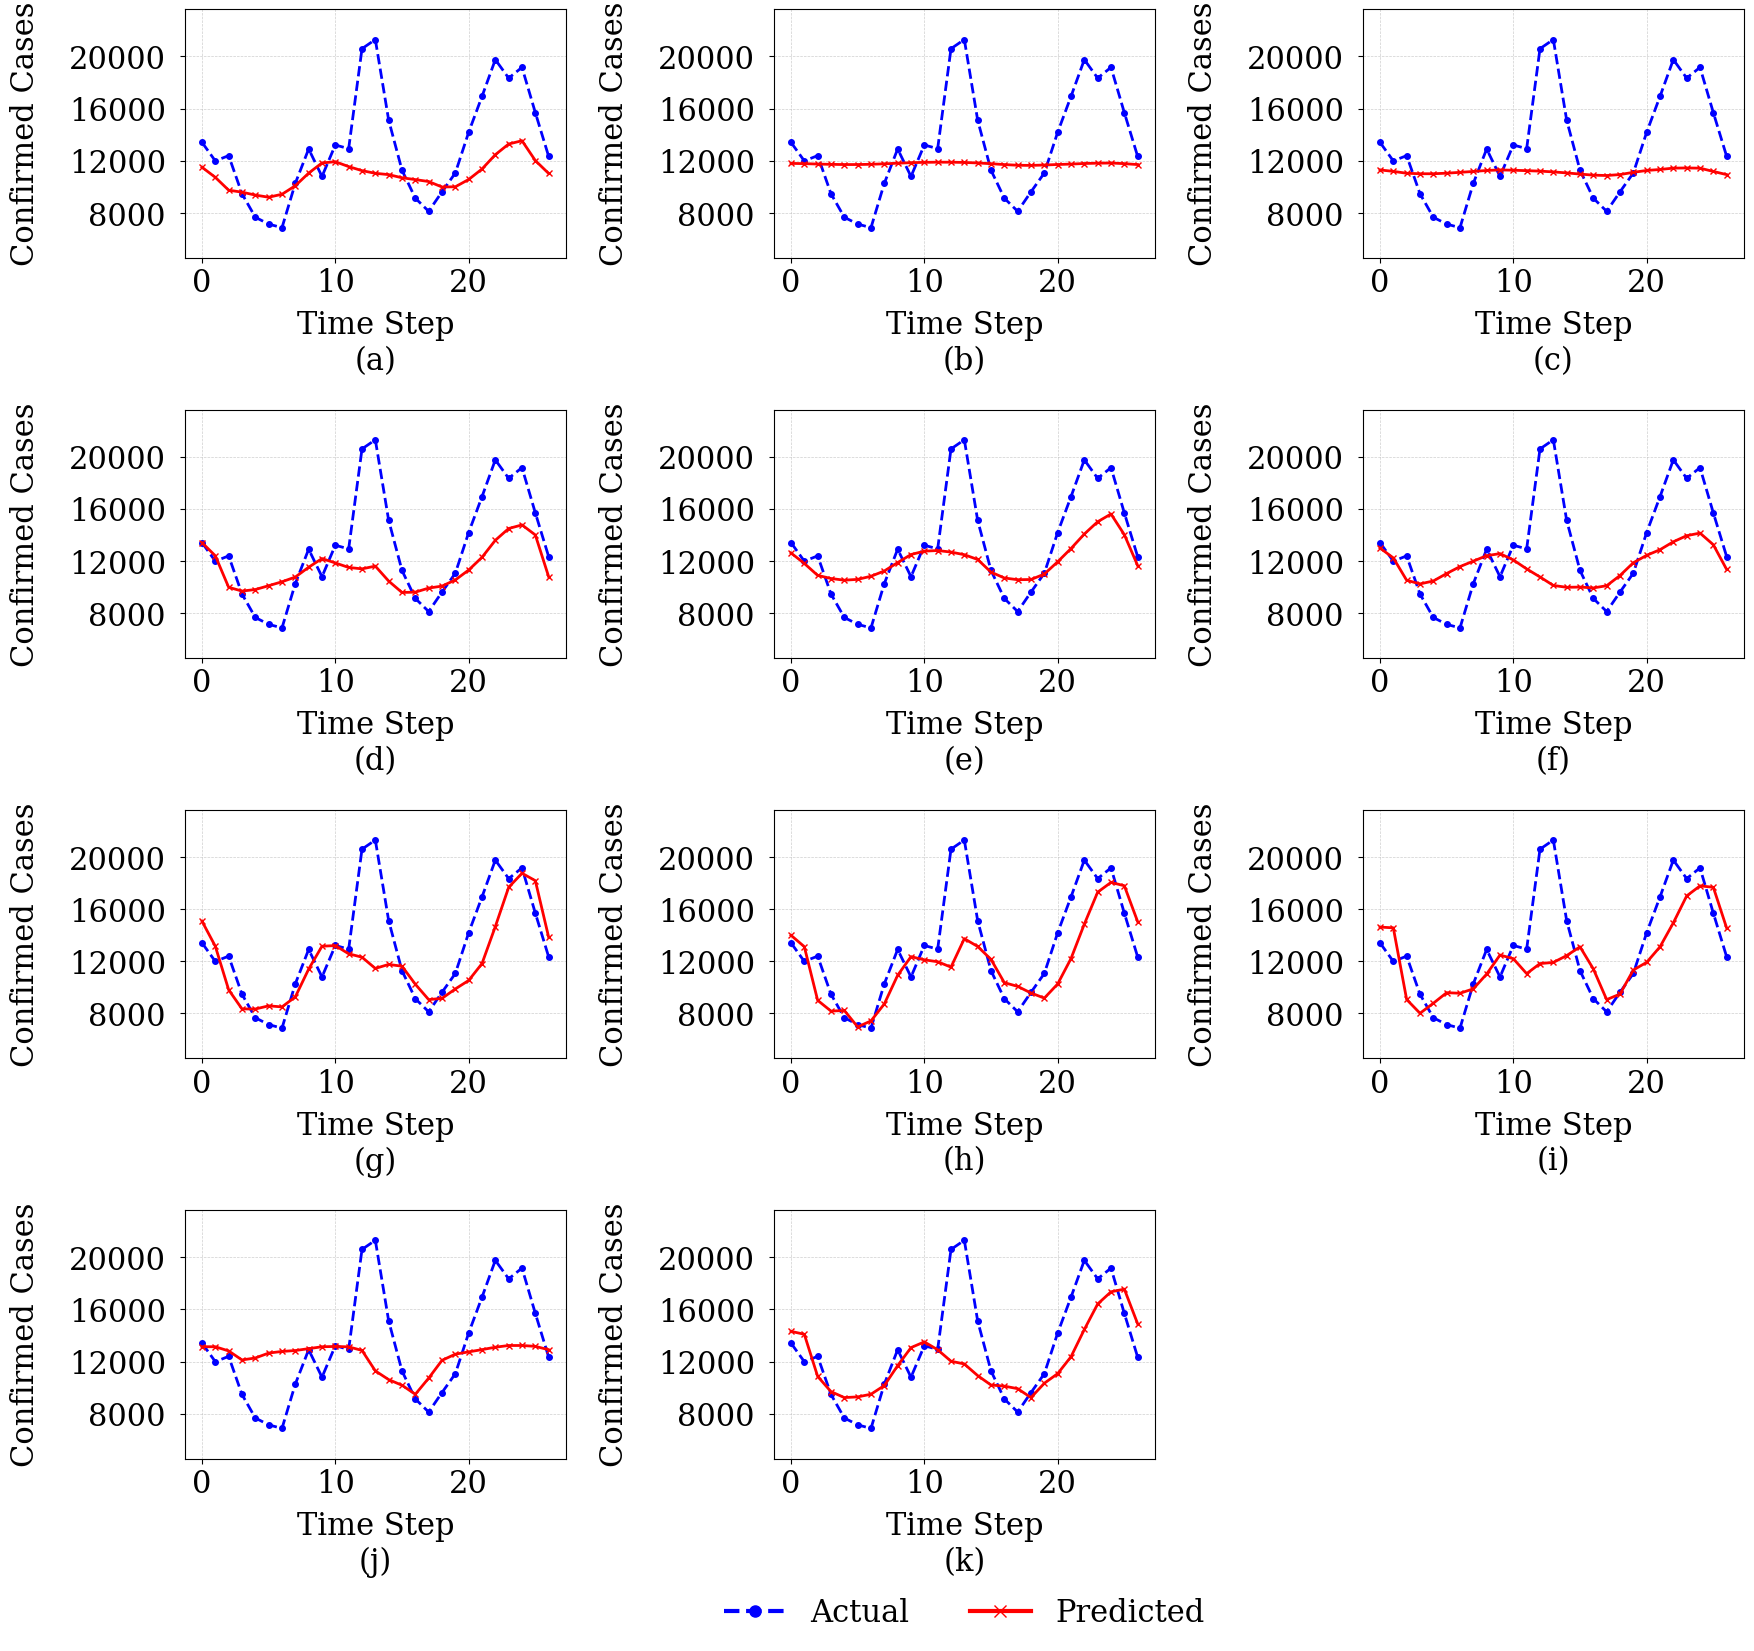

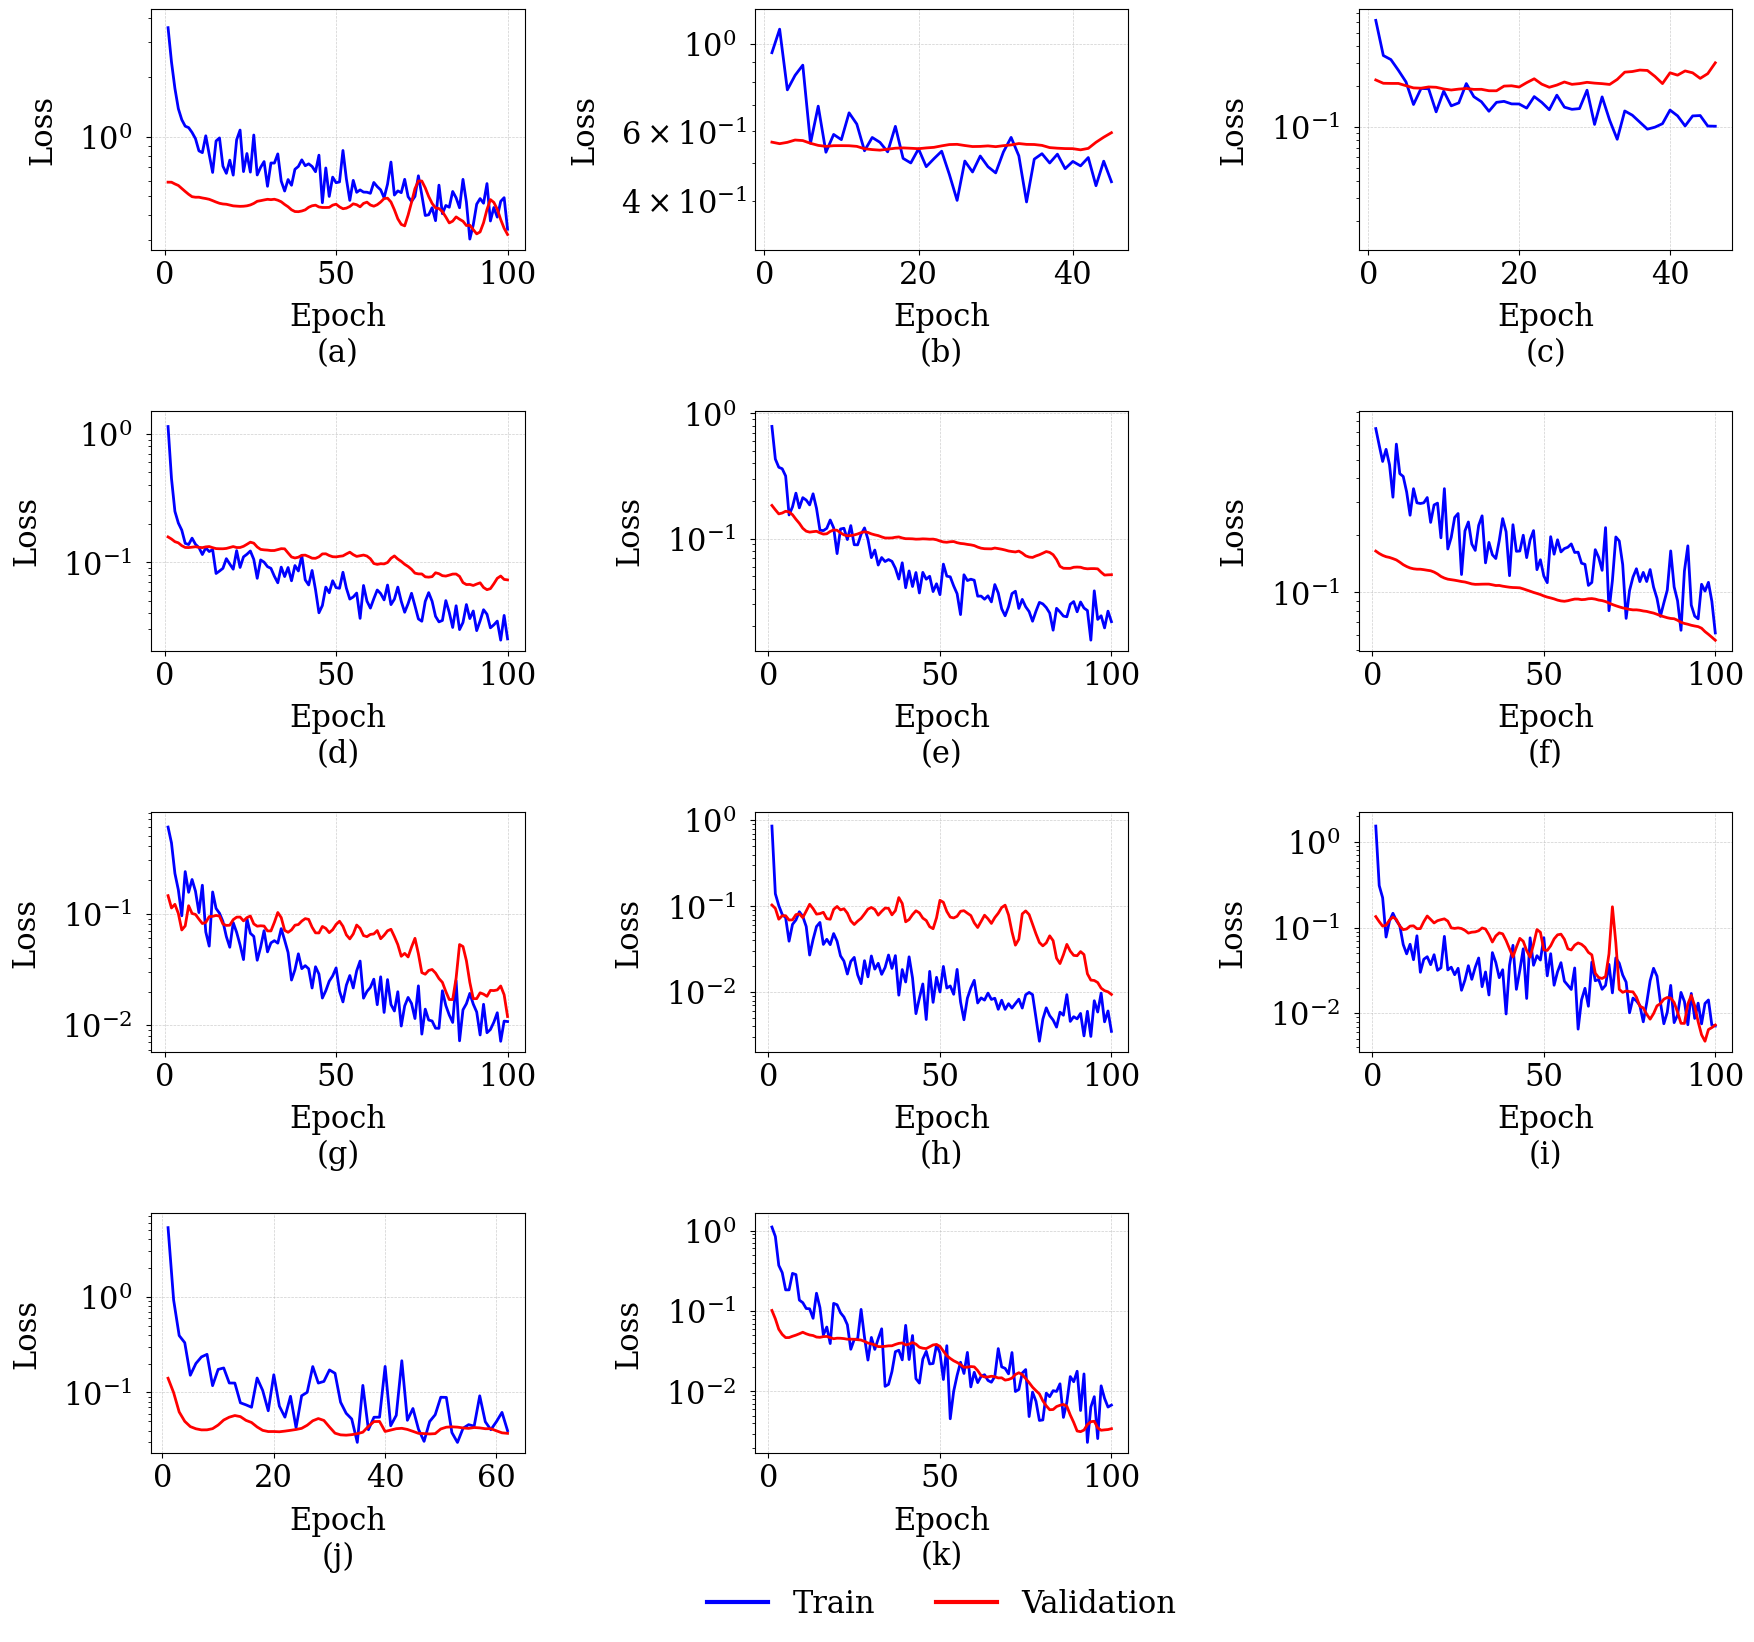

✅ Plotting completed: forecasts + loss curves saved.


In [17]:
# ==================================================================
# PLOTTING FORECASTS AND LOSS CURVES FOR GRID SEARCH RESULTS
# ==================================================================
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib as mpl
import warnings
import os

# === Style Configuration
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['grid.linestyle'] = '--'

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.font_manager")

print("✅ Using stored predictions and histories from previous cell...")

# === Preloaded Data
preds_by_key = all_predictions
history_by_key = all_histories
Y_true = Y_actual

# === Grid Config
plot_labels = ["MSE", "MAE"] + [f"MLC_P={p}" for p in [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]]
num_plots = len(plot_labels)
rows_grid = 4
cols_grid = 3
fig_w = 18
fig_h = 20

# -----------------------
# 1. Forecast Subplots
# -----------------------
fig_forecast, axes_forecast = plt.subplots(rows_grid, cols_grid, figsize=(fig_w, fig_h))
axes_forecast = axes_forecast.flatten()

for i, label in enumerate(plot_labels):
    ax = axes_forecast[i]
    time_steps = np.arange(len(Y_true))
    ax.plot(time_steps, Y_true, color='blue', linestyle='--', marker='o', markersize=4, linewidth=2, label='Actual')
    if label in preds_by_key and len(preds_by_key[label]) == len(Y_true):
        ax.plot(time_steps, preds_by_key[label], color='red', linestyle='-', marker='x', markersize=4, linewidth=2, label='Predicted')

    ax.set_xlabel(f"Time Step\n({chr(97+i)})", labelpad=8, fontsize=22)
    ax.set_ylabel("Confirmed Cases", fontsize=22, labelpad=20)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6, prune='both'))
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.tick_params(axis='y', which='major', pad=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    y_min, y_max = ax.get_ylim()
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

for ax in axes_forecast[num_plots:]:
    ax.set_visible(False)

legend_lines = [
    Line2D([0], [0], color='blue', linestyle='--', marker='o', markersize=8, linewidth=3),
    Line2D([0], [0], color='red', linestyle='-', marker='x', markersize=8, linewidth=3)
]
axes_forecast[num_plots - 1].legend(legend_lines, ["Actual", "Predicted"],
                                   loc="upper center",
                                   bbox_to_anchor=(0.5, -0.45),
                                   ncol=2,
                                   frameon=False,
                                   fontsize=22)

plt.subplots_adjust(hspace=0.9, wspace=0.6, left=0.1, right=0.95, bottom=0.1, top=0.95)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
fig_forecast.savefig("forecast_subplots_grid_search.pdf", bbox_inches='tight')
fig_forecast.savefig("forecast_subplots_grid_search.png", bbox_inches='tight', dpi=600)
plt.show()

# -----------------------
# 2. Loss Curves Subplots
# -----------------------
fig_loss, axes_loss = plt.subplots(rows_grid, cols_grid, figsize=(fig_w, fig_h))
axes_loss = axes_loss.flatten()

for i, label in enumerate(plot_labels):
    ax = axes_loss[i]
    if label in history_by_key:
        hist = history_by_key[label]
        if isinstance(hist, dict):
            if 'loss' in hist and len(hist['loss']) > 0:
                epochs = range(1, len(hist['loss']) + 1)
                ax.plot(epochs, hist['loss'], color='blue', linewidth=2, label='Train')
            if 'val_loss' in hist and len(hist['val_loss']) > 0:
                epochs = range(1, len(hist['val_loss']) + 1)
                ax.plot(epochs, hist['val_loss'], color='red', linewidth=2, label='Validation')

    ax.set_xlabel(f"Epoch\n({chr(97+i)})", labelpad=8, fontsize=22)
    ax.set_ylabel("Loss", fontsize=22, labelpad=15)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.tick_params(axis='y', which='major', pad=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    ax.set_yscale('log')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)

    if len(ax.lines) > 0:
        y_min, y_max = ax.get_ylim()
        y_range = y_max - y_min
        ax.set_ylim(max(0, y_min - 0.1 * y_range), y_max + 0.1 * y_range)

for ax in axes_loss[num_plots:]:
    ax.set_visible(False)

loss_legend_lines = [
    Line2D([0], [0], color='blue', linewidth=3),
    Line2D([0], [0], color='red', linewidth=3)
]
axes_loss[num_plots - 1].legend(loss_legend_lines, ["Train", "Validation"],
                               loc="upper center",
                               bbox_to_anchor=(0.5, -0.45),
                               ncol=2,
                               frameon=False,
                               fontsize=22)

plt.subplots_adjust(hspace=0.8, wspace=0.5, left=0.1, right=0.95, bottom=0.1, top=0.95)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
fig_loss.savefig("loss_curves_grid_search.pdf", bbox_inches='tight')
fig_loss.savefig("loss_curves_grid_search.png", bbox_inches='tight', dpi=600)
plt.show()

print("✅ Plotting completed: forecasts + loss curves saved.")

In [16]:
import dill

# Save everything in current session
with open('session.pkl', 'wb') as f:
    dill.dump_session(f)
